# Multiple Regressions
##### Multiple Regression

The goal of the project is to build a model that can accurately predict the car price based on these features.

You can apply:

Linear Regression — to find the best fit line.

Ridge & Lasso Regression — to control overfitting and handle multicollinearity.

OneHotEncoding — for categorical columns (fueltype, carbody, etc.).

Feature Scaling — for numeric columns (wheelbase, enginesize, etc.).

Pipeline — to automate preprocessing and modeling.

Evaluation Metrics — R², Adjusted R², MSE, RMSE.

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


1.train_test_split (from sklearn.model_selection)
👉 Purpose:

Splits your dataset into:

Training set → used to teach the model.

Testing set → used to evaluate how well the model generalizes.

2️⃣ OneHotEncoder & StandardScaler (from sklearn.preprocessing)

These are data preprocessing tools.
Machine learning models need numeric, scaled input — these tools help transform your raw data accordingly.

🧱 a) OneHotEncoder

Encodes categorical text variables (like “fueltype”, “carbody”) into numeric form.

b) StandardScaler

Standardizes (scales) numerical data to have:

Mean = 0

Standard deviation = 1

3️⃣ ColumnTransformer (from sklearn.compose)

Applies different preprocessing steps to different types of columns — all in one step.

4️⃣ Pipeline (from sklearn.pipeline)

Allows you to chain together preprocessing + modeling steps into one object.

5️⃣ LinearRegression, Ridge, Lasso (from sklearn.linear_model)

These are regression algorithms for predicting continuous outcomes (like car prices).

6️⃣ mean_squared_error, r2_score (from sklearn.metrics)

Used to evaluate regression model performance.

7️⃣ stats (from scipy)

Used for statistical analysis and hypothesis testing — adds formal statistical insight to your regression.

In [3]:
# ---------------- Step 1: Import data splitting function ----------------
from sklearn.model_selection import train_test_split
# Used to split your dataset into training and testing sets 
# (e.g., 80% train, 20% test) for evaluating model performance

# ---------------- Step 2: Import preprocessing tools ----------------
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# OneHotEncoder → converts categorical (text) features into numeric form (0s and 1s)
# StandardScaler → standardizes numerical features (mean=0, std=1) for uniform scaling

# ---------------- Step 3: Import ColumnTransformer ----------------
from sklearn.compose import ColumnTransformer
# Allows different preprocessing operations on different column types 
# (e.g., numeric columns scaled, categorical columns encoded)

# ---------------- Step 4: Import Pipeline ----------------
from sklearn.pipeline import Pipeline
# Chains multiple steps together (preprocessing + model) into a single workflow 
# Ensures the same transformations are applied during training and prediction

# ---------------- Step 5: Import Regression Models ----------------
from sklearn.linear_model import Ridge, Lasso, LinearRegression
# LinearRegression → Basic linear model without regularization
# Ridge Regression → L2 regularization (penalizes large coefficients to reduce overfitting)
# Lasso Regression → L1 regularization (shrinks less important coefficients to zero, helps feature selection)

# ---------------- Step 6: Import Evaluation Metrics ----------------
from sklearn.metrics import mean_squared_error, r2_score
# mean_squared_error (MSE) → measures average squared difference between predicted and actual values
# r2_score (R²) → measures how well the regression model explains the variance in the target variable

# ---------------- Step 7: Import Statistical Testing ----------------
from scipy import stats
# Provides statistical functions like t-tests and p-values
# Used for hypothesis testing to check if model predictions differ significantly from actual data


### Load and Inspect

In [4]:
df=pd.read_csv('CarPrice_Assignment.csv')
print("Data Load Successfully")
print("\n---Dataset Info----")
print(df.info())
print("\n---First 5 Rows----")
print(df.head())

Data Load Successfully

---Dataset Info----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  

### Basic Cleaning

In [5]:
# We’re simply creating a new column called CarBrand based on it.
df['CarBrand']=df['CarName'].apply(lambda x:x.split(' ')[0].lower())

# CarName → the full model name
# CarBrand → the extracted brand name

#####  Fix Possible spelling Erros

In [6]:
df['CarBrand'].replace({'maxda':'mazda','porcshe':'porsche','toyouta':'toyota','vokswagen':'Volkswagen','vw':'volkswagen'},inplace=True)
#Drop unneccessary columns
df.drop(['car_ID','CarName'],axis=1,inplace=True)

C:\Users\91939\AppData\Local\Temp\ipykernel_13400\56777555.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarBrand'].replace({'maxda':'mazda','porcshe':'porsche','toyouta':'toyota','vokswagen':'Volkswagen','vw':'volkswagen'},inplace=True)


In [7]:
df.info()
print()
df.columns 
print()
df['CarBrand'].unique()
print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

### Exploratory Data Analytics(EDA)


-----Summary Statitcs--------
        symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000   
mean     0.834146   98.756585  174.049268   65.907805   53.724878   
std      1.245307    6.021776   12.337289    2.145204    2.443522   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.300000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.100000   66.900000   55.500000   
max      3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000 

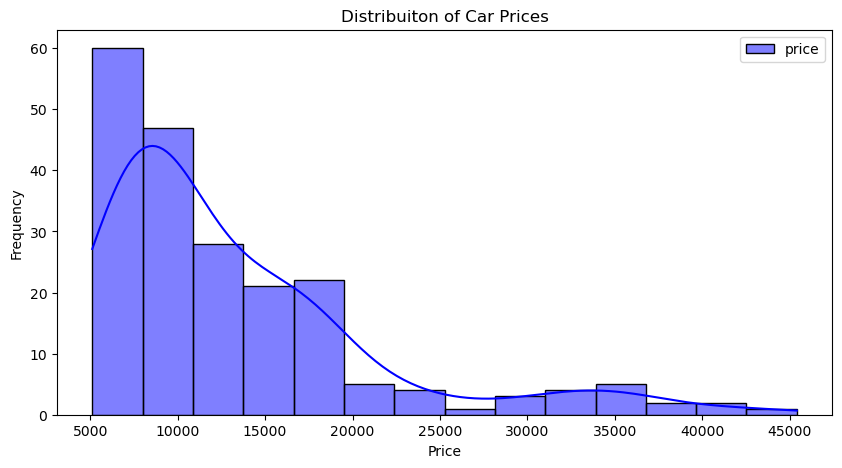

In [8]:
print("\n-----Summary Statitcs--------")
print(df.describe())
plt.figure(figsize=(10,5))
sns.histplot(df['price'],kde=True,color='blue',label='price')
plt.title('Distribuiton of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### ----Price Distribution-----

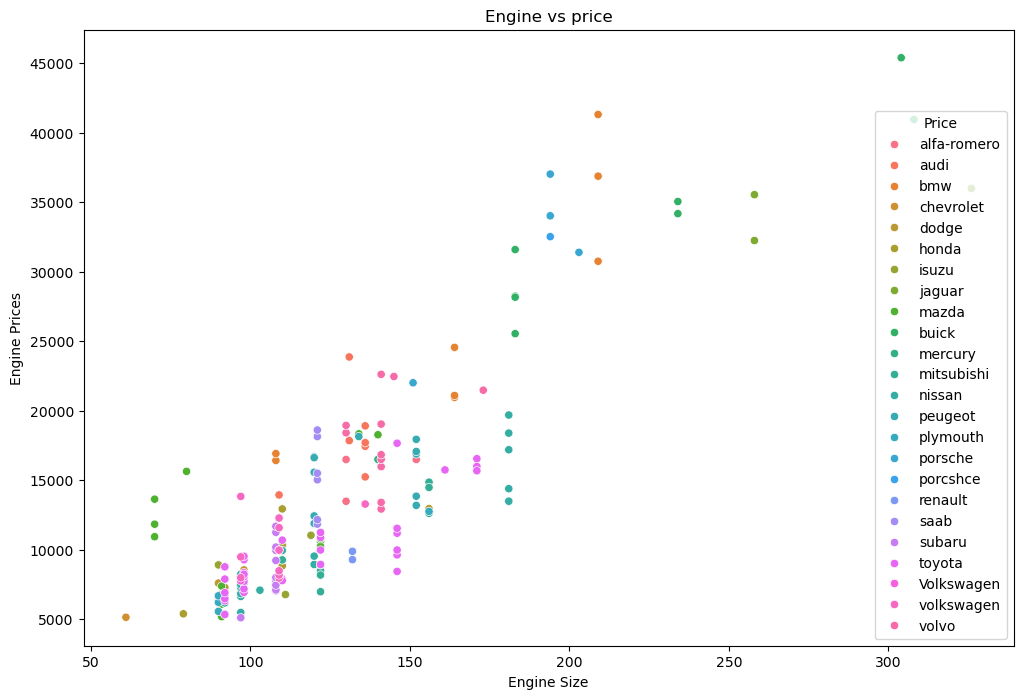

In [9]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='enginesize',y='price',hue='CarBrand',data=df)
plt.title("Engine vs price")
plt.xlabel("Engine Size")
plt.ylabel('Engine Prices')
plt.legend(title='Price')
plt.show()

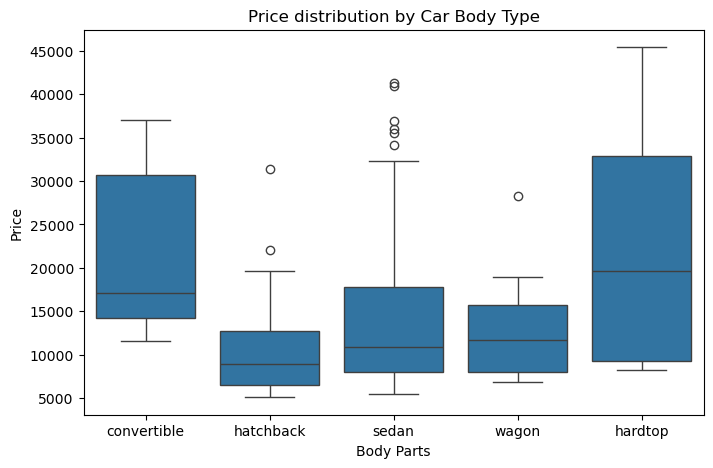

In [10]:
# Price by Car Body Type
plt.figure(figsize=(8,5))
sns.boxplot(x='carbody',y='price',data=df)
plt.title('Price distribution by Car Body Type')
plt.xlabel('Body Parts')
plt.ylabel('Price')
plt.show()

### Feature Selection

In [11]:
x=df.drop(['price'],axis=1)
y=df['price']
categorical_features=x.select_dtypes(include=['object']).columns.tolist()
numeric_features=x.select_dtypes(include=['int64','float64']).columns.tolist()

print('\nCategorical Columns:',categorical_features)
print('Numeric columns:',numeric_features)


Categorical Columns: ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'CarBrand']
Numeric columns: ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']


# 5.Preprocessing Pipeline

In [12]:
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(drop='first',handle_unknown='ignore')

preprocessor=ColumnTransformer(
    transformers=[
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ])


# 6.Train-Test Split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# 7.Build and Train Models

In [20]:
models={
    'Linear Regression':LinearRegression(),
    'Ridge Regression':Ridge(alpha=1.0),
    'Lasso Regression':Lasso(alpha=0.1)
}
result=[]
for name,model in models.items():
    pipe=Pipeline(steps=[
        ('preprocessor',preprocessor),
        ('model',model)
    ])
    pipe.fit(x_train,y_train)
    y_pred=pipe.predict(x_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    n = len(y_test)
    p = x_test.shape[1]

    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print(f"\n{name} Results")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R2): {r2:.3f}")
print(f"Adjusted R-squared: {adj_r2:.3f}")

    




Lasso Regression Results
Mean Squared Error (MSE): 7986412.27
Root Mean Squared Error (RMSE): 2826.02
R-Squared (R2): 0.899
Adjusted R-squared: 0.747


c:\Users\91939\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\91939\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\91939\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Hypothesis Testings


In [21]:
#Null Hypothesis(H0):Mean of predicted=mean of actual
best_model=LinearRegression()
pipe=Pipeline(steps=[('preprocessor',preprocessor),('model',best_model)])
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)

t_stat,p_val=stats.ttest_rel(y_test,y_pred)
print("\n Hypothesis Testing")
print(f"T-statistic:{t_stat:.3f},p-value:{p_val:.3f}")

alpha=0.05
if p_val<alpha:
    print("Reject Null Hypothesis: Predicted and Actual means differ significantly.")
else:
    print("Fail to Reject Null Hypothesis No significant difference between means")
    


 Hypothesis Testing
T-statistic:0.152,p-value:0.880
Fail to Reject Null Hypothesis No significant difference between means


c:\Users\91939\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:242: UserWarning: Found unknown categories in columns [7, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


# Data Visulization of Predictions

C:\Users\91939\AppData\Local\Temp\ipykernel_13400\184921084.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


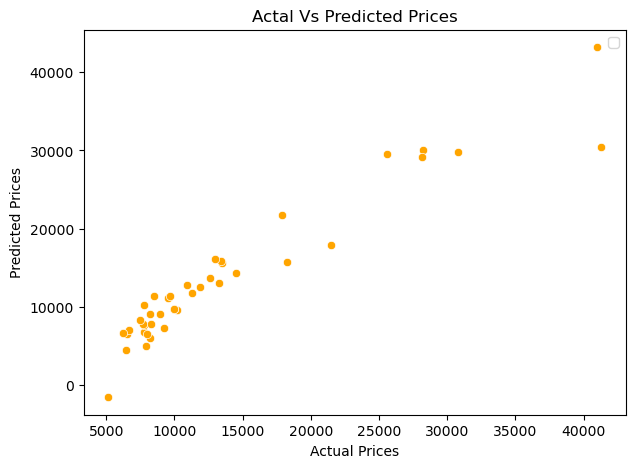

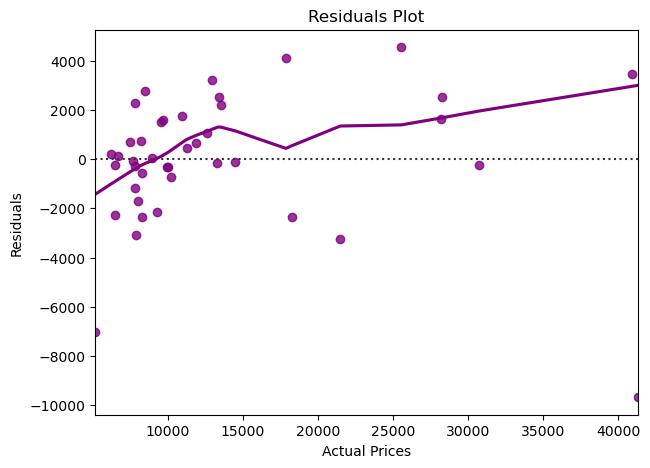

In [23]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y=y_pred,color='orange')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Actal Vs Predicted Prices")
plt.legend()
plt.show()

plt.figure(figsize=(7,5))
sns.residplot(x=y_test,y=y_pred-y_test,color='purple',lowess=True)
plt.title('Residuals Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.show()

##### Seaborn Visulizations

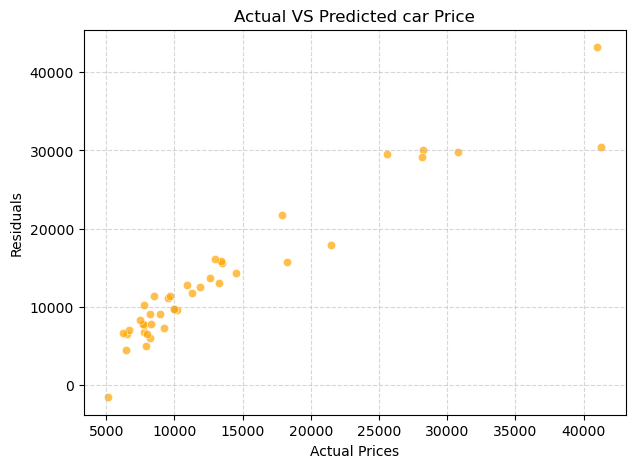

C:\Users\91939\AppData\Local\Temp\ipykernel_13400\2075412846.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


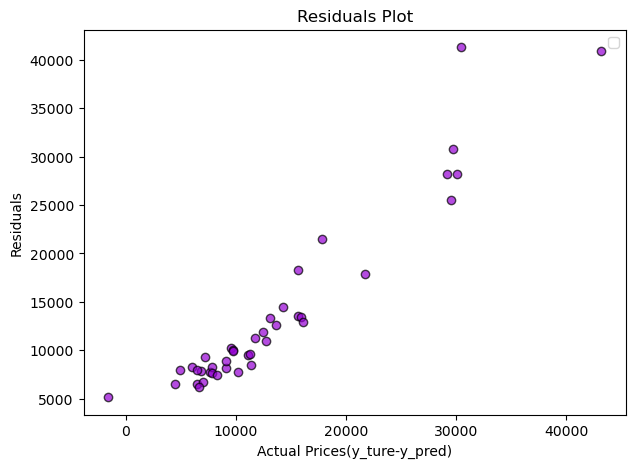

In [28]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y=y_pred,color='orange',alpha=0.7)
plt.title('Actual VS Predicted car Price')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.grid(True,linestyle='--',alpha=0.5)
plt.show()

#Residuals plots
plt.figure(figsize=(7,5))
plt.scatter(y_pred,y_test,color='darkviolet',edgecolors='k',alpha=0.7)
plt.title('Residuals Plot')
plt.xlabel('Actual Prices(y_ture-y_pred)')
plt.ylabel('Residuals')
plt.legend()
plt.show()